# Linear Regression using PyTorch

In this notebook, we will try to create a Linear Regression Model using PyTorch.\
We will create the dataset, and also make a customized class for our model.

We will use the Backpropagation Algorithm and builtin PyTorch SGD optimizer for our operations.\
We shall also try to plot the trained model.

In [1]:
# Import the libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create dataset
x_np, y_np = datasets.make_regression(200, 1, noise=25, random_state=365)

In [3]:
# convert data into Torch tensors
X = torch.from_numpy(x_np.astype(np.float32))
Y = torch.from_numpy(y_np.astype(np.float32))

# reshape the Y values into column vector
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

In [4]:
# Build Custom Model
class LinearRegression(nn.Module):
    
    def __init__(self, inp_dim, out_dim):
        super(LinearRegression, self).__init__()
        self.linreg = nn.Linear(inp_dim, out_dim)
        
    def forward(self, x):
        return self.linreg(x)

model = LinearRegression(n_features, 1)

In [5]:
# Selecting Loss Function and Optimizer
learning_rate = 0.033
n_iter = 140

criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# Training model
for epoch in range(n_iter):
    
    # forward prop
    y_pred = model(X)
    loss = criteria(y_pred, Y)
    
    # backward prop
    loss.backward()
    
    # update parms
    optimizer.step()
    optimizer.zero_grad()
    
    # print training data
    if (epoch+1)%10 == 0:
        print(f"epoch {epoch+1}: loss={loss.item():.5f} ")

epoch 10: loss=2365.38770 
epoch 20: loss=1163.07129 
epoch 30: loss=830.98743 
epoch 40: loss=739.25482 
epoch 50: loss=713.91284 
epoch 60: loss=706.91095 
epoch 70: loss=704.97626 
epoch 80: loss=704.44177 
epoch 90: loss=704.29407 
epoch 100: loss=704.25305 
epoch 110: loss=704.24170 
epoch 120: loss=704.23859 
epoch 130: loss=704.23773 
epoch 140: loss=704.23767 


Text(0.5, 1.0, 'Linear Regression Plot')

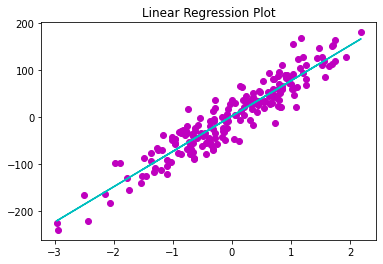

In [7]:
# Plot regression data
results = model(X).detach()

plt.plot(x_np, y_np, "mo")
plt.plot(x_np, results, "c")
plt.title("Linear Regression Plot")